In [7]:

from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from skopt.space import Categorical, Integer


from data_prep import load_and_preprocess_data
from ROC_gen import ROC_Generator
from conf_matrix import Matrix_Display
from skopt import BayesSearchCV

# Load the dataset

    # Train-test split
X_train, X_test, y_train, y_test, X, y = load_and_preprocess_data()

    # Logistic Regression
pipeline= Pipeline ([
    ('smotetomek', SMOTETomek(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42))
    ])

search_space = {
    'RF__n_estimators': Integer(50, 500),
    'RF__max_depth': Integer(3, 50),
    'RF__min_samples_split': Integer(2, 20),
    'RF__min_samples_leaf': Integer(1, 20),
    'RF__max_features': Categorical(['sqrt', 'log2', None]),
    'RF__bootstrap': Categorical([True, False])
}

opt = BayesSearchCV(pipeline, search_space, cv=10, n_iter=20, scoring='f1_macro', random_state=42)



In [8]:
opt.fit(X_train, y_train)


,estimator,Pipeline(step...m_state=42))])
,search_spaces,"{'RF__bootstrap': Categorical(c...), prior=None), 'RF__max_depth': Integer(low=3...m='normalize'), 'RF__max_features': Categorical(c...), prior=None), 'RF__min_samples_leaf': Integer(low=1...m='normalize'), ...}"
,optimizer_kwargs,None
,n_iter,20
,scoring,'f1_macro'
,fit_params,None
,n_jobs,1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,10


In [9]:
opt.best_estimator_


,steps,"[('smotetomek', ...), ('RF', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,smote,None
,tomek,None
,n_jobs,None
,n_estimators,500
,criterion,'gini'


In [10]:
opt.best_score_
#best CV F1

np.float64(0.7019653387382827)

In [11]:
y_pred = opt.predict(X_test)


In [12]:
opt.score(X_test, y_test)


0.7142857142857143

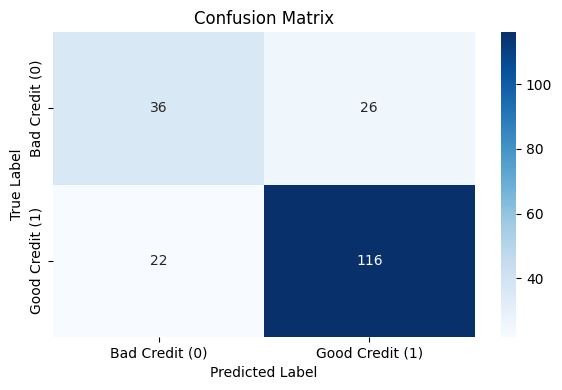

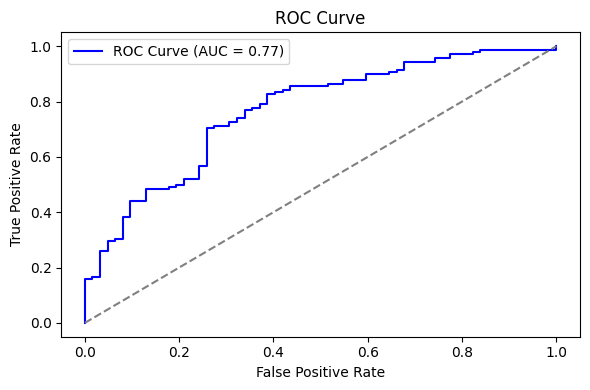

In [13]:
Matrix_Display(y_test, y_pred)
y_probs = opt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
ROC_Generator(fpr,tpr,roc_auc)
